In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

ModuleNotFoundError: No module named 'lab1'

In [10]:
test = pd.read_csv('test.csv')
test = test[['point', 'hour', 'sum', 'error']]
test['timestamp']= [datetime.fromtimestamp(x) for x in test['hour']]
test['Dates'] = pd.to_datetime(test['timestamp']).dt.date
test['Time'] = pd.to_datetime(test['timestamp']).dt.time
test.sort_values(by=['sum'], ascending=False)

,point,hour,sum,error,timestamp,Dates,Time
258,0101000020E6100000C1A95B4732403E40494A4ED65FF7...,1582999200,40,2.446153,2020-02-29 21:00:00,2020-02-29,21:00:00
143,0101000020E6100000A4566D514B503E4006FC5DE561F8...,1581775200,40,38.754735,2020-02-15 17:00:00,2020-02-15,17:00:00
34,0101000020E61000002D2BB0848B4A3E402B348A98ADF9...,1581069600,38,17.754735,2020-02-07 13:00:00,2020-02-07,13:00:00
436,0101000020E6100000C5FE0F8FE53D3E4033438EB75DF6...,1583006400,37,2.865846,2020-02-29 23:00:00,2020-02-29,23:00:00
438,0101000020E6100000328064CC3E483E400C288C4EF3F7...,1581426000,37,35.754735,2020-02-11 16:00:00,2020-02-11,16:00:00
...,...,...,...,...,...,...,...
96,0101000020E6100000202C93AD71513E40CEB8CE2B18F8...,1582441200,5,1.254735,2020-02-23 10:00:00,2020-02-23,10:00:00
404,0101000020E61000008EC74389B67D3E4033438EB75DF6...,1580803200,5,3.754735,2020-02-04 11:00:00,2020-02-04,11:00:00
93,0101000020E6100000CFC2D4BC375B3E408A05A0FCDCFF...,1581249600,5,1.254735,2020-02-09 15:00:00,2020-02-09,15:00:00
570,0101000020E6100000E56B5A23B84F3E40134E7A739601...,1581447600,5,3.754735,2020-02-11 22:00:00,2020-02-11,22:00:00


In [11]:
predict = pd.read_csv('predict_df_test.csv')
predict

,Unnamed: 0,point,hour,sum,error,timestamp
0,0,0101000020E61000000C830D47F15C3E400A41C338F1F6...,1581066000,2.558591,2.126721,2020-02-07 09:00:00
1,1,0101000020E61000000C830D47F15C3E400A41C338F1F6...,1581195600,3.465191,0.442922,2020-02-08 21:00:00
2,2,0101000020E61000000C830D47F15C3E400A41C338F1F6...,1581969600,3.763389,1.391462,2020-02-17 20:00:00
3,3,0101000020E61000000C830D47F15C3E400A41C338F1F6...,1582920000,3.708965,0.887319,2020-02-28 20:00:00
4,4,0101000020E61000000C830D47F15C3E40CAE971F73AF7...,1580680800,2.304778,1.603288,2020-02-02 22:00:00
...,...,...,...,...,...,...
646,646,0101000020E6100000F914E08938443E407916A554F5F8...,1580943600,2.355529,1.547198,2020-02-05 23:00:00
647,647,0101000020E6100000F914E08938443E407916A554F5F8...,1581202800,1.844322,8.217482,2020-02-08 23:00:00
648,648,0101000020E6100000F914E08938443E407916A554F5F8...,1581418800,2.718051,1.943286,2020-02-11 11:00:00
649,649,0101000020E6100000F914E08938443E407916A554F5F8...,1581804000,2.958963,1.365694,2020-02-15 22:00:00


In [13]:
popular = test.groupby(['point']).size().reset_index(name='counts')
popular.sort_values(by=['counts'], ascending=False, inplace=True)
popular

,point,counts
145,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,27
121,0101000020E6100000CFC2D4BC375B3E401FBF4913EFF5...,19
113,0101000020E6100000C1A95B4732403E40494A4ED65FF7...,19
4,0101000020E61000000FD8C18EA45A3E40CAE971F73AF7...,18
81,0101000020E61000009A92A823F9323E40DDC94EE7B4FD...,18
...,...,...
68,0101000020E610000081AECA13B1623E4033438EB75DF6...,1
66,0101000020E61000007B5916CCFD643E4074DD5BB2DBED...,1
64,0101000020E61000006AEBE80E454C3E407F614299EAF3...,1
56,0101000020E61000006141807FDE503E400C288C4EF3F7...,1


In [16]:
visual_test = test[test.point == popular.point.iloc[0]].sort_values(by=['timestamp'], ascending=True)
visual_test

,point,hour,sum,error,timestamp,Dates,Time
82,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580630400,21,2.254735,2020-02-02 11:00:00,2020-02-02,11:00:00
15,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580659200,8,0.088069,2020-02-02 19:00:00,2020-02-02,19:00:00
354,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580763600,7,0.370265,2020-02-04 00:00:00,2020-02-04,00:00:00
376,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580828400,15,1.754735,2020-02-04 18:00:00,2020-02-04,18:00:00
192,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580835600,8,2.754735,2020-02-04 20:00:00,2020-02-04,20:00:00
648,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581080400,8,0.088069,2020-02-07 16:00:00,2020-02-07,16:00:00
567,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581084000,13,11.754735,2020-02-07 17:00:00,2020-02-07,17:00:00
200,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581192000,8,1.421402,2020-02-08 23:00:00,2020-02-08,23:00:00
433,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581260400,6,0.578598,2020-02-09 18:00:00,2020-02-09,18:00:00
474,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581314400,10,0.754735,2020-02-10 09:00:00,2020-02-10,09:00:00


In [17]:
visual_predict = predict[predict.point == popular.point.iloc[0]].sort_values(by=['timestamp'], ascending=True)
visual_predict

,Unnamed: 0,point,hour,sum,error,timestamp
615,615,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580641200,12.384401,0.695682,2020-02-02 11:00:00
616,616,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580670000,10.856021,0.263082,2020-02-02 19:00:00
617,617,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580774400,5.726037,0.222486,2020-02-04 00:00:00
618,618,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580839200,10.773913,0.392252,2020-02-04 18:00:00
619,619,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1580846400,11.014179,0.273664,2020-02-04 20:00:00
620,620,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581091200,11.719732,0.317391,2020-02-07 16:00:00
621,621,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581094800,10.869836,0.195970,2020-02-07 17:00:00
622,622,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581202800,8.477209,0.056293,2020-02-08 23:00:00
623,623,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581271200,10.723852,0.440500,2020-02-09 18:00:00
624,624,0101000020E6100000EC2F1F510A6D3E4058AA511532F3...,1581325200,10.105330,0.010423,2020-02-10 09:00:00


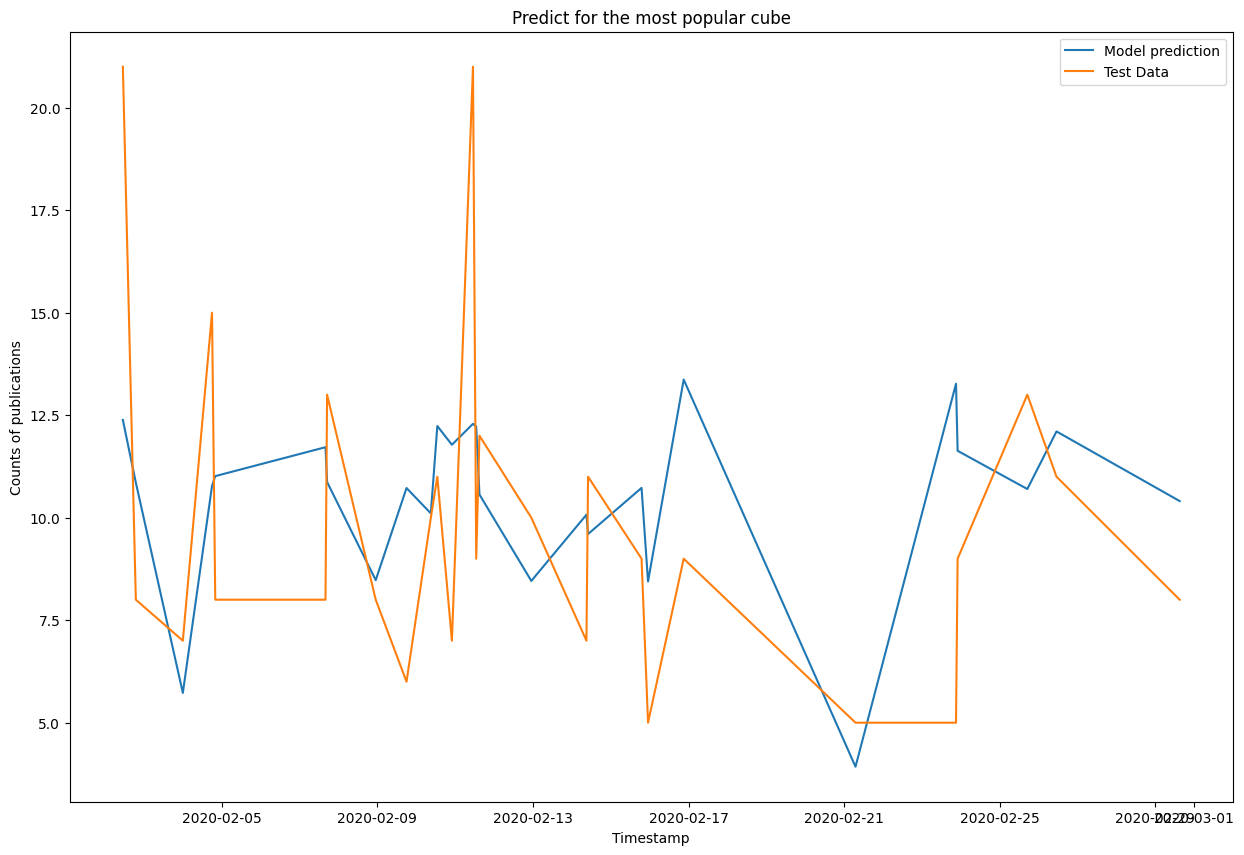

In [25]:
fig = plt.figure(figsize=(15, 10))
plt.plot(pd.to_datetime(visual_predict['timestamp']), visual_predict['sum'], label='Model prediction')
plt.plot(pd.to_datetime(visual_test['timestamp']), visual_test['sum'], label='Test Data')
plt.legend()
# plt.grid()
plt.xlabel("Timestamp")
plt.ylabel('Counts of publications')
plt.title('Predict for the most popular cube')
# plt.savefig('most_popular_cube.jpg', bbox_inches='tight')
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='sum'>

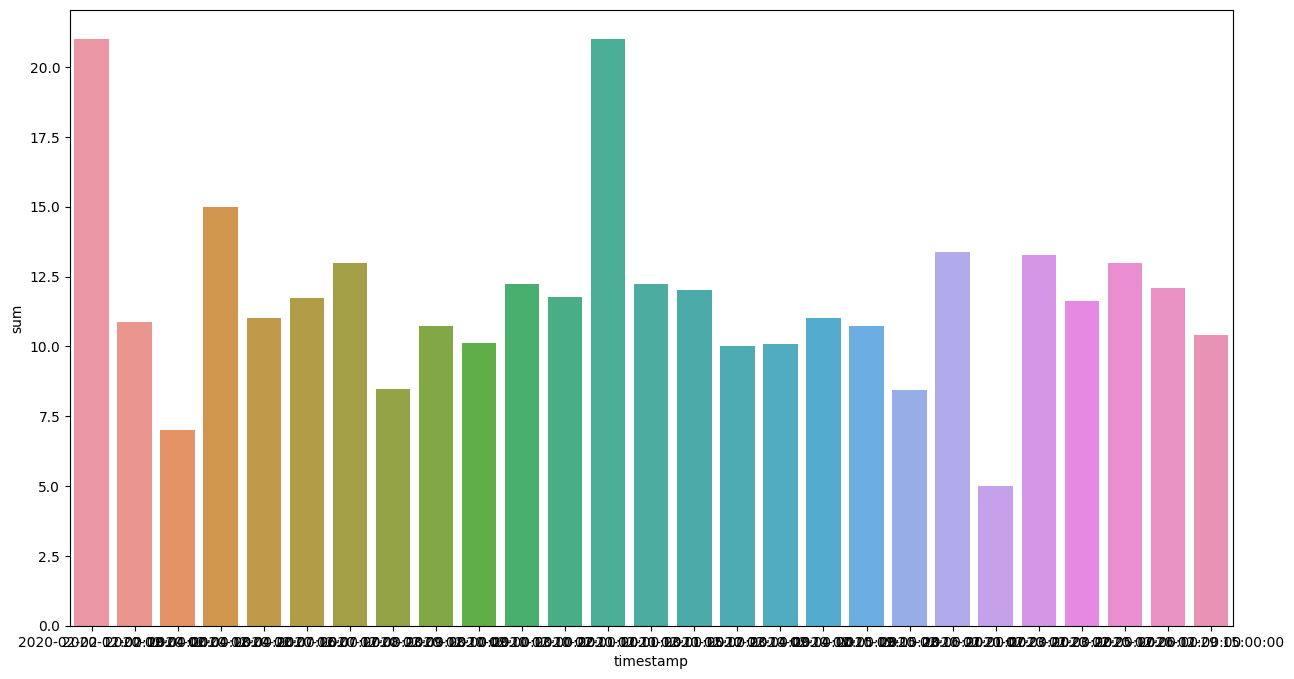

In [28]:
plt.figure(figsize = (15,8))
sns.barplot(x = 'timestamp', y = 'sum',data = visual_test)
sns.barplot(x = 'timestamp', y = 'sum',data = visual_predict)

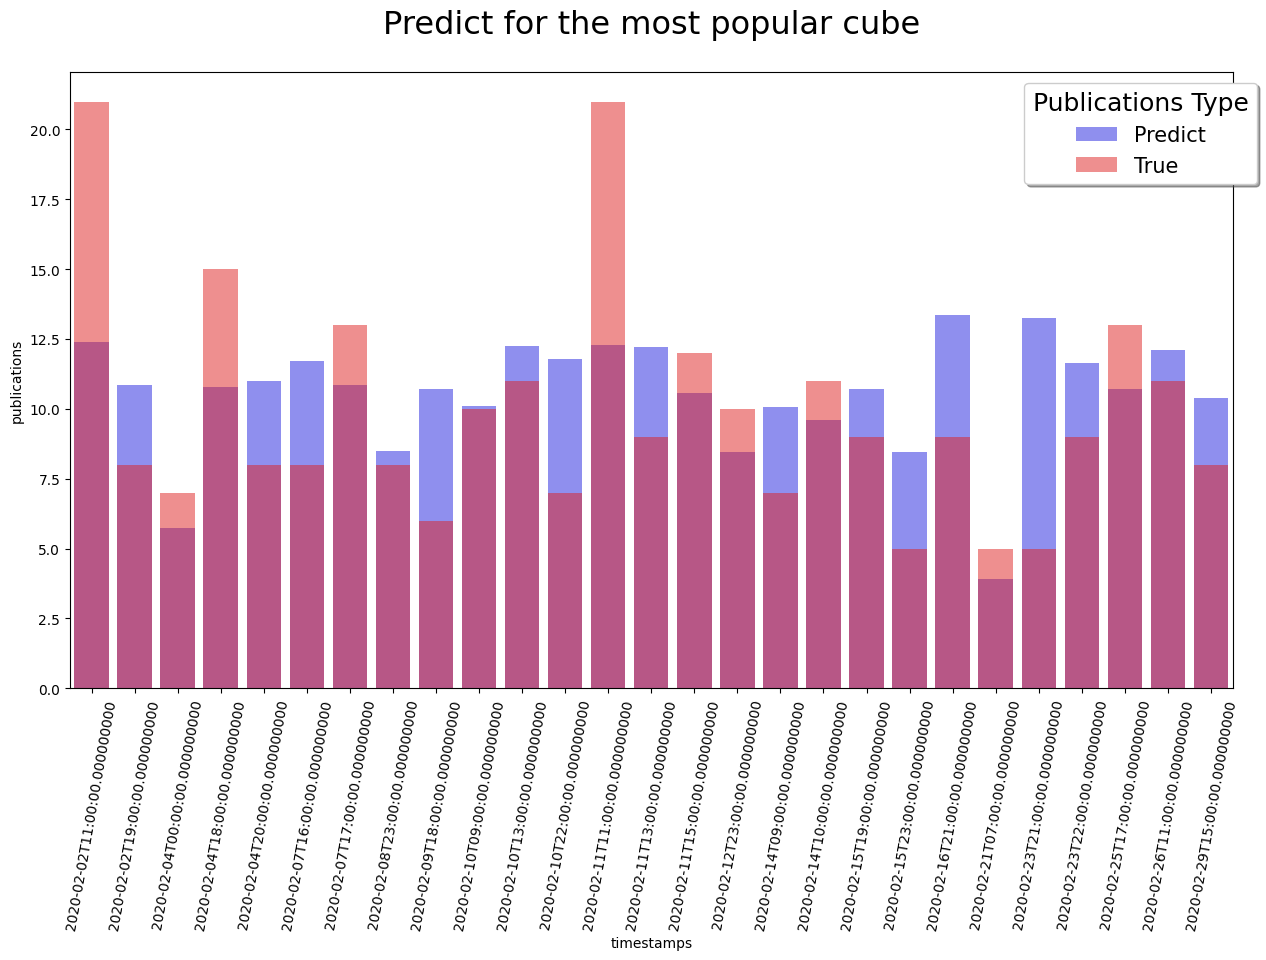

In [52]:
# creating subplots
ax = plt.subplots(figsize = (15,8))

# plotting columns
ax = sns.barplot(x=visual_predict['timestamp'], y=visual_predict['sum'], color='b', alpha=0.5, label='Predict')
ax = sns.barplot(x=visual_test['timestamp'], y=visual_test['sum'], color='r', alpha=0.5, label='True')

# renaming the axes
ax.set(xlabel="timestamps", ylabel="publications")
ax.set_title('Predict for the most popular cube', fontsize = 23, y =1.05)
ax.legend(fontsize = 15,
               bbox_to_anchor= (1.03, 1),
               title="Publications Type",
               title_fontsize = 18,
               shadow = True,
               facecolor = 'white')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
plt.savefig('most_popular_cube.jpg', bbox_inches='tight')
# visualizing illustration
plt.show()

In [53]:
def error(y_pred, y_true):
    return (np.abs(y_pred - y_true)) / y_pred

In [56]:
np.mean(error(visual_predict['sum'].values, visual_test['sum'].values))

0.28414404597187753

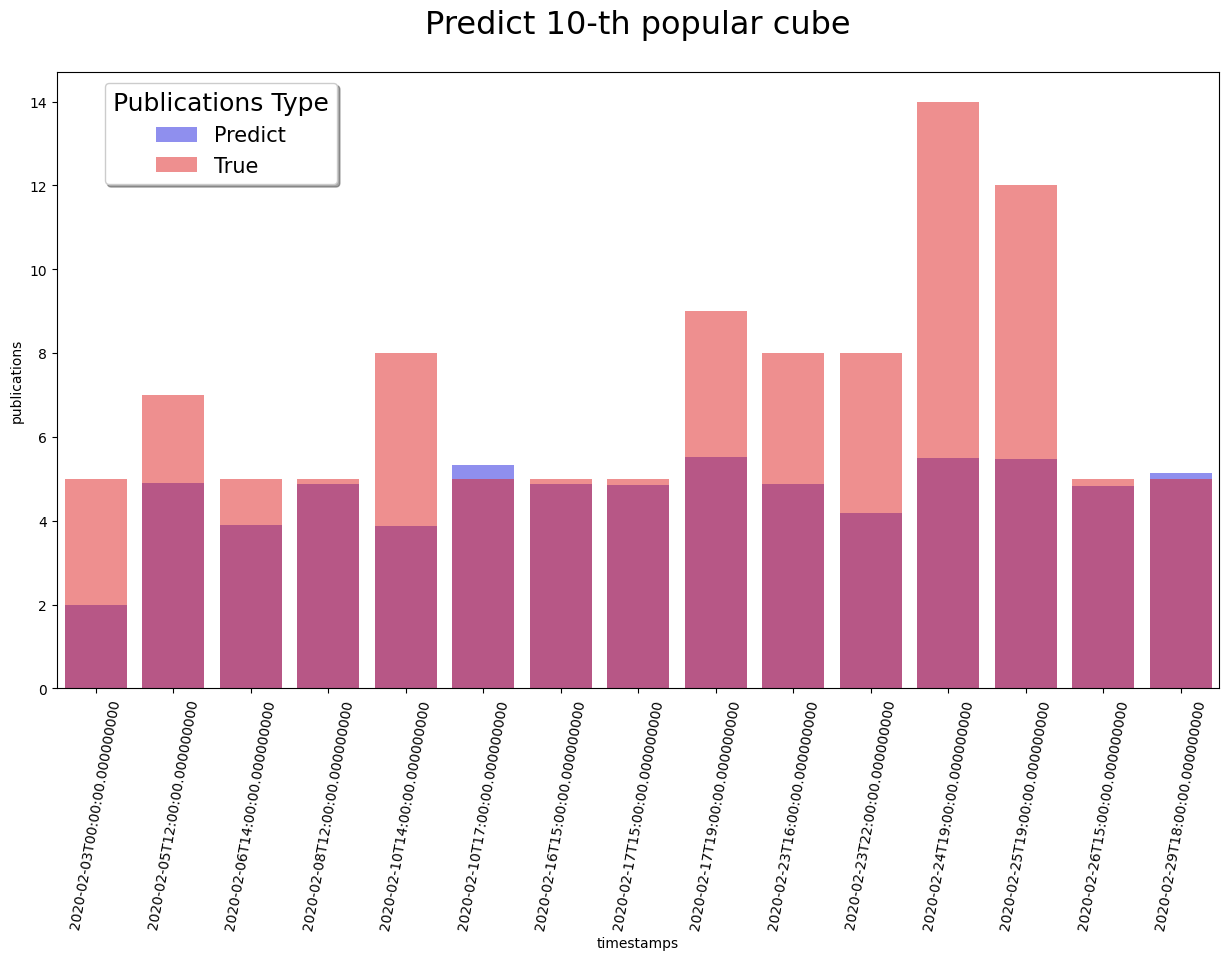

In [66]:
visual_test_unpopular = test[test.point == popular.point.iloc[9]].sort_values(by=['timestamp'], ascending=True)
visual_predict_unpopular = predict[predict.point == popular.point.iloc[9]].sort_values(by=['timestamp'], ascending=True)
# creating subplots
ax = plt.subplots(figsize = (15,8))

# plotting columns
ax = sns.barplot(x=visual_predict_unpopular['timestamp'], y=visual_predict_unpopular['sum'], color='b', alpha=0.5, label='Predict')
ax = sns.barplot(x=visual_test_unpopular['timestamp'], y=visual_test_unpopular['sum'], color='r', alpha=0.5, label='True')

# renaming the axes
ax.set(xlabel="timestamps", ylabel="publications")
ax.set_title('Predict 10-th popular cube', fontsize = 23, y =1.05)
ax.legend(fontsize = 15,
          bbox_to_anchor= (0.25, 1),
          title="Publications Type",
          title_fontsize = 18,
          shadow = True,
          facecolor = 'white')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)
plt.savefig('10_popular_cube.jpg', bbox_inches='tight')
# visualizing illustration
plt.show()

In [67]:
np.mean(error(visual_predict_unpopular['sum'].values, visual_test_unpopular['sum'].values))

0.5602815086487161